In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME = 'SAIDL/core ML'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/SAIDL/core ML/datasets
/content/drive/My Drive/SAIDL/core ML


In [ ]:
# Run some setup code for this notebook.
import random
import numpy as np
from datasets.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


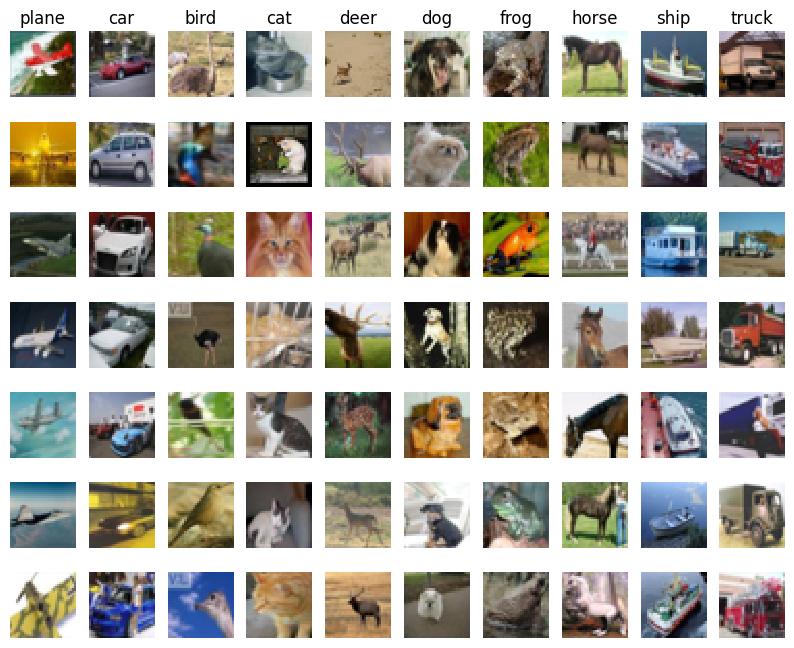

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training - num_validation, num_training)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [ ]:
y_train = y_train.flatten()

# Total number of images
num_samples = len(y_train)

# Number of images to change (60%)
noise = 0.6 #noise rate
num_to_change = int(noise * num_samples)

# Randomly select 60% of indices
indices_to_change = np.random.choice(num_samples, num_to_change, replace=False)

# Function to generate new random labels (ensuring they are different)
def random_new_label(old_label):
    new_label = np.random.randint(0, 10)  # CIFAR-10 has 10 classes (0-9)
    while new_label == old_label:
        new_label = np.random.randint(0, 10)
    return new_label

# Change labels at selected indices
for idx in indices_to_change:
    y_train[idx] = random_new_label(y_train[idx])

# Reshape y_train back to original shape
y_train = y_train.reshape(-1, 1)

# Check how many labels changed
print(f"Total samples: {num_samples}")
print(f"Modified labels: {num_to_change}")

Total samples: 49000
Modified labels: 29400


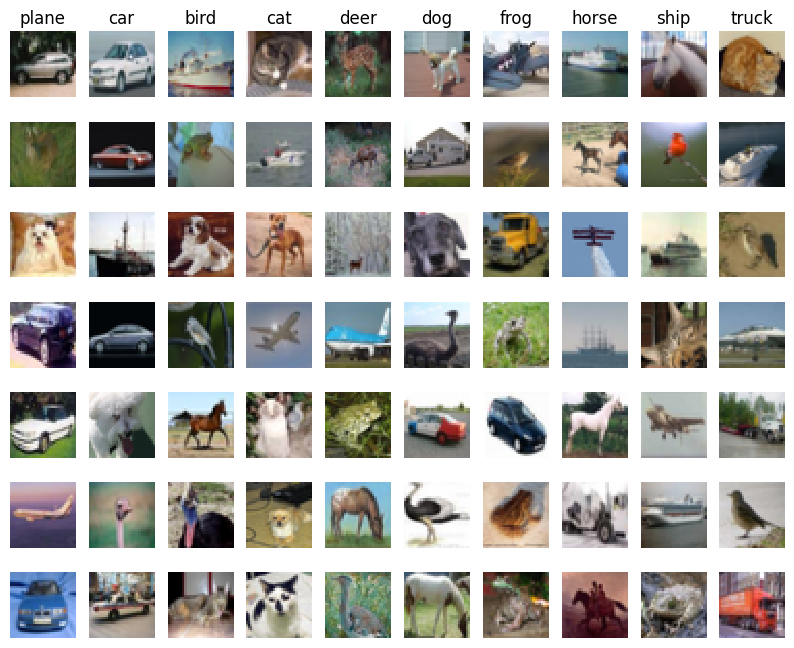

In [ ]:
# Visualize some examples from the dataset.
# This shows incorrectly labelled data.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Making sure test data is still unhindered

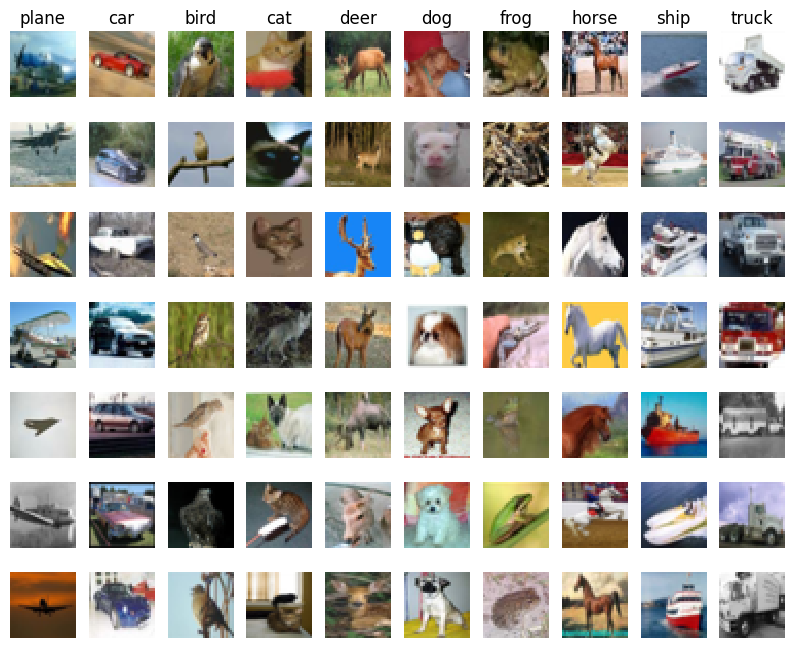

In [ ]:
# Visualize some examples from the dataset.
# This shows incorrectly labelled data.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


I will now remove the bias from each image in the dataset by subtracting the mean value from each pixel of each image. This helps our model to work faster since the images become more centred around 0.

In [ ]:
mean_image = np.mean(X_train, axis=0)  # Compute the average pixel value
X_train -= mean_image  # Normalize training data
X_val -= mean_image  # Normalize validation data
X_test -= mean_image  # Normalize test data
X_dev -= mean_image  # Normalize development set

I will now append a bias vector to each image so that I dont have to deal with it individually while applying gradient descent.

**NOTE:** dont run this code again, it will keep appending a column

In [ ]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


I will now declare a W and name it as **W_ce**: which will hold the weights

1.   List item
2.   List item

for the standard cross entropy loss.

In [ ]:
W_ce = np.random.randn(3073, 10) * 0.0001

We calculate scores and store it in a matrix of dimension:

In [ ]:
scores = X_train.dot(W_ce)
print(scores.shape)

(49000, 10)


In [ ]:
exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
y_hat = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [ ]:
def cross_entropy_loss(y_train, y_pred, batch_size=1000):
    epsilon = 1e-12  # Avoid log(0)
    total_loss = 0.0
    num_batches = len(y_train) // batch_size
    for i in range(num_batches):
        batch_start = i * batch_size
        batch_end = batch_start + batch_size

        batch_preds = y_pred[batch_start:batch_end]  # (batch_size, 10)
        batch_labels = y_train[batch_start:batch_end]  # (batch_size,)

        batch_preds = np.clip(batch_preds, epsilon, 1.0)  # Numerical stability (avoids log(0))
        batch_log_probs = -np.log(batch_preds[np.arange(batch_size), batch_labels])

        total_loss += np.sum(batch_log_probs)

    return total_loss / len(y_train)  # Average loss

# Compute loss in smaller batches
loss = cross_entropy_loss(y_train, y_hat, batch_size=1000)

print("Scores Shape:", scores.shape)  # (49000, 10)
print("Predicted Probabilities Shape:", y_hat.shape)  # (49000, 10)
print("Average Cross-Entropy Loss:", loss)

Scores Shape: (49000, 10)
Predicted Probabilities Shape: (49000, 10)
Average Cross-Entropy Loss: 2372.8444984787434


In [ ]:
def softmax(scores):
    """
    Computes the softmax probabilities for each class.

    Parameters:
        scores (numpy array): Shape (N, C), raw scores before softmax.

    Returns:
        numpy array: Shape (N, C), probabilities after applying softmax.
    """
    # Shift values for numerical stability (avoid overflow issues)
    scores -= np.max(scores, axis=1, keepdims=True)

    # Compute exponentials
    exp_scores = np.exp(scores)

    # Normalize by sum of exponentials
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [ ]:
def one_hot_encode(y, num_classes):
    """
    Converts a vector of labels into a one-hot encoded matrix.

    Parameters:
        y (numpy array): Shape (N,), containing class labels (0 to num_classes-1).
        num_classes (int): Number of classes.

    Returns:
        numpy array: Shape (N, num_classes), one-hot encoded labels.
    """
    N = len(y)
    one_hot = np.zeros((N, num_classes))
    one_hot[np.arange(N), y] = 1
    return one_hot

# Convert y_train (shape: (49000,)) into one-hot (shape: (49000, 10))
y_one_hot = one_hot_encode(y_train, num_classes=10)


In [ ]:
num_epochs = 100 # Number of times we go through the dataset
eta = 0.001

for epoch in range(num_epochs):
    # Compute scores
    scores = np.dot(X_train, W_ce)  # (49000, 10)

    # Compute softmax probabilities
    y_hat = softmax(scores)

    # Compute gradient
    grad_W = (X_train.T @ (y_hat - y_one_hot)) / len(y_train)  # (3073, 10

    # Update weights
    W_ce -= eta * grad_W

    # Compute new loss
    loss = cross_entropy_loss(y_train, y_hat, batch_size=1000)

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Training complete!")

Epoch 0, Loss: 2372.8445
Epoch 10, Loss: 24592.5795
Epoch 20, Loss: 24583.2900
Epoch 30, Loss: 24580.7037
Epoch 40, Loss: 24579.7402
Epoch 50, Loss: 24579.3262
Epoch 60, Loss: 24579.1174
Epoch 70, Loss: 24578.9891
Epoch 80, Loss: 24578.8931
Epoch 90, Loss: 24578.8131
Training complete!


In [ ]:
scores_test = np.dot(X_test, W_ce)  # Compute raw scores (shape: (10000, 10))
y_hat_test = softmax(scores_test)   # Convert scores to probabilities (shape: (10000, 10))

# Convert probabilities to class predictions (choose the class with highest probability)
y_pred = np.argmax(y_hat_test, axis=1)  # Shape: (10000,)

In [ ]:
accuracy = np.mean(y_pred == y_test)  # Fraction of correct predictions
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 11.20%


In [ ]:
import torch
import torch.nn.functional as F

# Assuming X_train and y_train are already given
# X_train: (49000, 3073)  -> Feature matrix (including bias)
# y_train: (49000, 1)      -> Labels (class indices 0-9)

# Convert y_train to tensor and remove extra dimension
X_train = torch.tensor(X_train, dtype=torch.float32)  # Shape (49000, 3073)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze()  # Shape (49000,)

# Hyperparameters
num_classes = 10
num_features = 3073  # Includes bias term
learning_rate = 0.001
num_epochs = 10
batch_size = 128

# Initialize weights W_nce (randomly)
W_nce = torch.randn(num_features, num_classes, requires_grad=True)  # Shape (3073, 10)

# Define Normalized Cross-Entropy Loss function
class NormalizedCrossEntropyLoss(torch.nn.Module):
    def __init__(self, epsilon=1e-8):
        super(NormalizedCrossEntropyLoss, self).__init__()
        self.epsilon = epsilon  # To prevent division by zero

    def forward(self, logits, targets):
        """
        logits: Raw scores from the model, shape (batch_size, 10)
        targets: Ground truth labels, shape (batch_size,)
        """
        num_classes = logits.shape[1]

        # Convert targets to one-hot representation
        target_one_hot = F.one_hot(targets, num_classes).float()

        # Compute standard cross-entropy loss
        log_probs = F.log_softmax(logits, dim=1)
        ce_loss = -(target_one_hot * log_probs).sum(dim=1).mean()

        # Compute entropy of the true distribution
        target_probs = target_one_hot.mean(dim=0)  # Average over batch
        entropy = -(target_probs * target_probs.clamp(min=self.epsilon).log()).sum()

        # Compute normalized cross-entropy loss
        nce_loss = ce_loss / (entropy + self.epsilon)  # Prevent division by zero

        return nce_loss

# Instantiate loss function
criterion = NormalizedCrossEntropyLoss()

# Accuracy calculation function
def compute_accuracy(scores, y_true):
    """
    Computes classification accuracy.
    scores: Raw model outputs, shape (N, 10)
    y_true: Ground truth labels, shape (N,)
    """
    predictions = scores.argmax(dim=1)  # Get predicted class (highest score)
    correct = (predictions == y_true).sum().item()
    accuracy = correct / y_true.shape[0]
    return accuracy * 100  # Return as percentage

# Training loop with mini-batch gradient descent
for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Mini-batch selection
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass: Compute raw scores
        scores = X_batch @ W_nce  # Shape (batch_size, 10)

        # Compute loss
        loss = criterion(scores, y_batch)

        # Backward pass: Compute gradients
        loss.backward()

        # Update weights using gradient descent
        with torch.no_grad():
            W_nce -= learning_rate * W_nce.grad  # Gradient update

        # Zero gradients
        W_nce.grad.zero_()

    # Compute accuracy at the end of each epoch
    train_acc = compute_accuracy(X_train @ W_nce, y_train)
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}, Accuracy = {train_acc:.2f}%")


<ipython-input-24-1c7478852e18>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)  # Shape (49000, 3073)
<ipython-input-24-1c7478852e18>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).squeeze()  # Shape (49000,)


Epoch 1: Loss = 931.6991, Accuracy = 11.61%
Epoch 2: Loss = 761.7690, Accuracy = 11.98%
Epoch 3: Loss = 660.4206, Accuracy = 11.99%
Epoch 4: Loss = 592.0534, Accuracy = 12.06%
Epoch 5: Loss = 549.7986, Accuracy = 12.13%
Epoch 6: Loss = 518.2829, Accuracy = 12.24%
Epoch 7: Loss = 485.6355, Accuracy = 12.38%
Epoch 8: Loss = 460.2980, Accuracy = 12.47%
Epoch 9: Loss = 438.8572, Accuracy = 12.54%
Epoch 10: Loss = 419.0782, Accuracy = 12.58%


Calculating Active passive loss using NMAE and NCE

In [ ]:
import torch
import torch.nn.functional as F

class NormalizedActivePassiveLoss(torch.nn.Module):
    def __init__(self, alpha=0.001):
        """
        Normalized Active-Passive Loss (APL) = alpha * NCE + (1 - alpha) * NMAE
        alpha: Balances between NCE and NMAE (0 ≤ alpha ≤ 1)
        """
        super(NormalizedActivePassiveLoss, self).__init__()
        self.alpha = alpha

    def forward(self, logits, targets):
        """
        logits: Model outputs (raw scores), shape (batch_size, num_classes)
        targets: Ground truth labels, shape (batch_size,)
        """
        num_classes = logits.shape[1]

        # Convert targets to one-hot representation
        target_one_hot = F.one_hot(targets, num_classes).float()

        # --- 1. Compute Normalized Cross-Entropy (NCE) ---
        # Standard CE loss
        ce_loss = F.cross_entropy(logits, targets, reduction='mean')
        # Uniform entropy (H_u = log(C))
        H_u = torch.log(torch.tensor(num_classes, dtype=torch.float))
        # NCE Loss
        nce_loss = ce_loss / H_u

        # --- 2. Compute Normalized MAE (NMAE) ---
        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        mae_loss = torch.abs(probs - target_one_hot).mean()
        # Maximum possible MAE between two probability distributions is 2
        nmae_loss = mae_loss / 2.0

        # --- 3. Normalized Active-Passive Loss ---
        loss = self.alpha * nce_loss + (1 - self.alpha) * nmae_loss
        return loss


# Instantiate loss function with normalized version
criterion = NormalizedActivePassiveLoss(alpha=0.003)  # Adjust alpha based on noise level

# Training loop
for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Mini-batch selection
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass: Compute raw scores
        scores = X_batch @ W_nce  # Shape (batch_size, num_classes)

        # Compute loss
        loss = criterion(scores, y_batch)

        # Backward pass: Compute gradients
        loss.backward()

        # Update weights using gradient descent
        with torch.no_grad():
            W_nce -= learning_rate * W_nce.grad  # Gradient update

        # Zero gradients
        W_nce.grad.zero_()

    # Compute accuracy at the end of each epoch
    train_acc = compute_accuracy(X_train @ W_nce, y_train)
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}, Accuracy = {train_acc:.2f}%")


Epoch 1: Loss = 0.4596, Accuracy = 15.73%
Epoch 2: Loss = 0.4595, Accuracy = 15.78%
Epoch 3: Loss = 0.4594, Accuracy = 15.77%
Epoch 4: Loss = 0.4592, Accuracy = 15.80%
Epoch 5: Loss = 0.4591, Accuracy = 15.86%
Epoch 6: Loss = 0.4591, Accuracy = 15.90%
Epoch 7: Loss = 0.4591, Accuracy = 15.92%
Epoch 8: Loss = 0.4593, Accuracy = 15.93%
Epoch 9: Loss = 0.4594, Accuracy = 15.95%
Epoch 10: Loss = 0.4594, Accuracy = 15.96%
